In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd 
import os 
import tensorflow as tf



In [2]:
from pyts.classification import BOSSVS
from pyts.multivariate.classification import MultivariateClassifier
import shutil
from keras.callbacks import CSVLogger
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
from pandas import DataFrame
import sktime
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from datetime import datetime
from keras.layers import Conv1D, Dense, Dropout, Input, Concatenate, GlobalMaxPooling1D, BatchNormalization
from keras.layers.convolutional import MaxPooling1D
from numpy import mean
from numpy import std
from numpy import dstack

from matplotlib import pyplot
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten,LSTM
from keras.utils import to_categorical
from keras.layers import Dense, Activation, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
from pandas import DataFrame

import IPython
from IPython.display import Audio
import scipy
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
# import mglearn
import graphviz

In [7]:
import librosa
import librosa.display
import os 
import pandas as pd 
import numpy as np

In [8]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io

In [9]:
fname="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LABALA.csv"
os.path.isfile(fname)

True

In [10]:
os.getcwd()

'C:\\Users\\pierr'

In [11]:
#VERSION TEST DONNEES NON LABELLISEES

data_dir_train="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/Train/"
data_dir_test="C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/Sample_TEST_HSN"

labels=pd.read_csv("C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LABALA.csv")

data_files=[]
file_names=[]

data_files_TEST=[]
file_names_TEST=[]

Class=np.array(labels["Class"])
fnames=np.array(labels["Filename"])



for filename in os.listdir(data_dir_train):
    f = os.path.join(data_dir_train,filename)
    if os.path.isfile(f):
        data_files.append(f)
        file_names.append(filename)
        






for filename in os.listdir(data_dir_test):
    f = os.path.join(data_dir_test,filename)
    if os.path.isfile(f):
        data_files_TEST.append(f)
        file_names_TEST.append(filename)

In [12]:
sample_length = []       
delta_mean_beatframes=[]
tempo_data=[]
std_constrast=[]
mean_constrast=[]
mean_oenv=[]
std_oenv=[]
minmax=[]
mean_spec_flatness=[]
minmax_spec_flatness=[]
max_spec_flatness=[]
mean_pulse_lognorm=[]
minmax_pulse_lognorm=[]
max_spec_bw=[]
min_spec_bw=[]
mean_spec_bw=[]
std_spec_bw=[]
minmax_spec_bw=[]
mean_rms= []
std_rms=[]
minmax_rms=[]
mean_max_roll= []
mean_min_roll= []
mean_min_max=[]
stft_out=[]
chroma_stft=[]
mfcc_out =[]
chroma_stft_std=[]
mfcc_out_std =[]
melspec_mean=[]
melspec_std=[]
nb_features=18


for i in range(1):

        
        wav_fname = pjoin(data_dir_train, fnames[i])
        samplerate, data = wavfile.read(wav_fname)
        number_of_channels = 2
        length = data.shape[0] / samplerate
        sample_length.append(length)
        length = 0.01
        Data=np.array(data[:,1]).astype(float)

        tempo, beatframes= librosa.beat.beat_track(y=Data)
        

        delta=[]

                             
        for k in range(0,len(beatframes)-1):
            delta.append(beatframes[k+1]-beatframes[k])

        lib_STFT=np.abs(librosa.stft(Data))
        contrast = librosa.feature.spectral_contrast(S=lib_STFT)
        
        oenv = librosa.onset.onset_strength(y=Data)
        prior = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)
        mean_pulse_lognorm.append(np.mean(np.array(librosa.beat.plp(onset_envelope=oenv,
                                 prior=prior))))
        minmax_pulse_lognorm.append(max(np.array(librosa.beat.plp(onset_envelope=oenv,
                                 prior=prior)))-min(np.array(librosa.beat.plp(onset_envelope=oenv,
                                 prior=prior))))

        tempo_data.append(tempo)
        delta_mean_beatframes.append(np.mean(delta))
        std_constrast.append(np.std(contrast))
        mean_constrast.append(np.mean(contrast))
        mean_rms.append(np.mean(librosa.feature.rms(y=Data)[0]))
        std_rms.append(np.std(librosa.feature.rms(y=Data)[0]))
        minmax_rms.append(max(librosa.feature.rms(y=Data)[0])-min(librosa.feature.rms(y=Data)[0]))
        mean_oenv.append(np.mean(oenv))
        std_oenv.append(np.std(oenv))
        minmax.append(abs(max(oenv)-abs(min(oenv))))
        mean_spec_flatness.append(np.mean(librosa.feature.spectral_flatness(y=Data)))
        max_spec_flatness.append(np.max(np.array(librosa.feature.spectral_flatness(y=Data))))
        minmax_spec_flatness.append(np.max(np.array(librosa.feature.spectral_flatness(y=Data))-min(np.array(librosa.feature.spectral_flatness(y=Data)))))  
        max_spec_bw.append(max(np.array(librosa.feature.spectral_bandwidth(y=Data)[0])))
        min_spec_bw.append(min(np.array(librosa.feature.spectral_bandwidth(y=Data)[0])))
        mean_spec_bw.append(np.mean(np.array(librosa.feature.spectral_bandwidth(y=Data)[0])))
        std_spec_bw.append(np.std(np.array(librosa.feature.spectral_bandwidth(y=Data)[0])))
        minmax_spec_bw.append(max(np.array(librosa.feature.spectral_bandwidth(y=Data)[0]))-min(np.array(librosa.feature.spectral_bandwidth(y=Data)[0])))
        mean_max_roll.append(np.mean(np.array(librosa.feature.spectral_rolloff(y=Data,roll_percent=0.99)[0])))
        mean_min_roll.append(np.mean(np.array(librosa.feature.spectral_rolloff(y=Data,roll_percent=0.01)[0])))
        mean_min_max.append(np.mean(np.array(librosa.feature.spectral_rolloff(y=Data,roll_percent=0.99)[0])) -np.mean(np.array(librosa.feature.spectral_rolloff(y=Data,roll_percent=0.01)[0])))
           
            
            


        stft_out = np.abs(librosa.stft(Data))
        chroma_stft.append(np.mean(np.mean(librosa.feature.chroma_stft(S=stft_out).T,axis=0)))
        chroma_stft_std.append(np.std(np.mean(librosa.feature.chroma_stft(S=stft_out).T,axis=0)))
        mfcc_out.append(np.mean(np.mean(librosa.feature.mfcc(y=Data).T,axis=0)))
        mfcc_out_std.append(np.std(np.mean(librosa.feature.mfcc(y=Data).T,axis=0)))
        melspec_mean.append(np.std(np.mean(librosa.feature.melspectrogram(y=Data).T,axis=0)))
        melspec_std.append(np.mean(np.mean(librosa.feature.melspectrogram(y=Data).T,axis=0)))
        
positive_idx = np.where(Class=="Positive")[0]
neutral_idx=np.where(Class=="Neutral")[0]
negative_idx=np.where(Class=="Negative")[0]


# Choosing features : 
    
#https://librosa.org/doc/latest/feature.html

In [14]:
data.shape

(99072, 2)

In [9]:
labl=[]
for i in range(len(Class)):
    if Class[i]=="Negative":
        labl.append(0)
    if Class[i]=="Positive":
        labl.append(1)
    if Class[i]=="Neutral":
        labl.append(2)

In [10]:
# data_matrix=pd.DataFrame(np.vstack((mean_spec_bw,std_constrast,mean_constrast,std_spec_bw,mean_spec_flatness,mean_rms
#                                     ,std_rms,minmax_rms,mean_max_roll,mean_min_roll,mean_min_max,chroma_stft,mfcc_out,
#                                     melspec_std,melspec_mean))).T



data_matrix=pd.DataFrame(np.vstack((
                        mean_constrast,mean_oenv,
                        std_oenv,minmax,mean_spec_bw,mean_rms,std_rms,minmax_rms,mfcc_out_std,melspec_mean,
                        melspec_std))).T

print(data_matrix.shape)

Class=np.reshape(Class,(-1,1))

print(Class.shape)

(250, 11)
(250, 1)


In [11]:

x_train, x_test, y_train, y_test = train_test_split(data_matrix, Class, test_size=0.2, random_state=5)

#print(y_train)

model = RandomForestClassifier(n_estimators=1000,
                               random_state=25)

    
model.fit(x_train, y_train)
prediction= model.predict(x_test)
f1= f1_score(y_test,prediction,average='weighted')


    
print(f1)
print(f1_score(y_test,prediction,average='micro'))
print(f1_score(y_test,prediction,average='macro'))



0.9801226053639845
0.98
0.9810983397190295


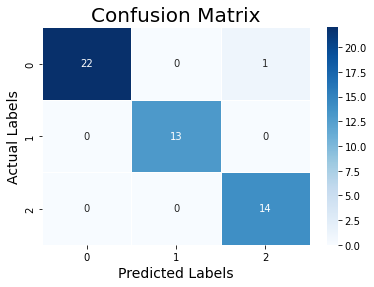

In [12]:

#Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import seaborn as sns

conf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data_matrix,labl, test_size=0.2, random_state=6)


model = KNeighborsClassifier(3,weights='distance')
model.fit(x_train, y_train)
prediction= model.predict(x_test)
f1= f1_score(y_test,prediction,average='weighted')


    
print(f1)
print(f1_score(y_test,prediction,average='micro'))

0.8450349650349651
0.8399999999999999


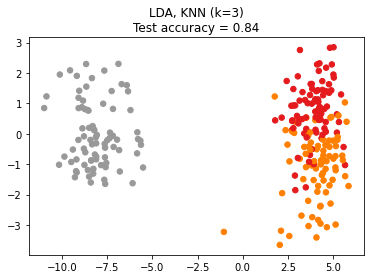

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors =3 
random_state =50


# Load Digits dataset

dim = len(data_matrix[0])
n_classes = len(np.unique(Class))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=3, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2,solver='svd'))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=3, random_state=random_state),
)

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(3,weights='distance')

# Make a list of the methods to be compared
dim_reduction_methods = [("LDA", lda)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(x_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(x_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(x_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(data_matrix)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labl, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )

plt.show()


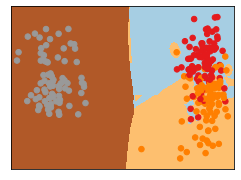

In [15]:
import numpy as np
import pylab as pl
from sklearn import neighbors, datasets

h = .02 # step size in the mesh




# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_embedded[:,0].min() - .5, X_embedded[:,0].max() + .5
y_min, y_max = X_embedded[:,1].min() - .5, X_embedded[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)


# Plot also the training points



pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labl, s=30, cmap="Set1")

pl.show()

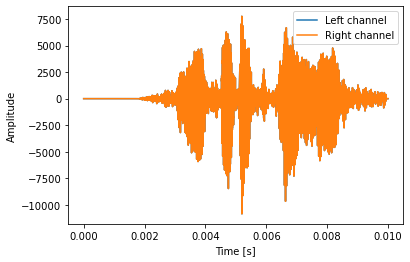

In [16]:


import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

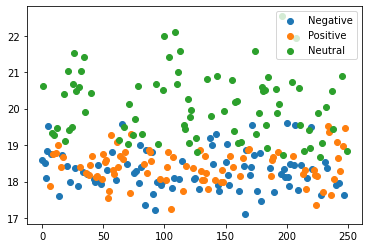

In [17]:
plt.scatter(np.array(np.arange(len(Class)))[negative_idx],np.array(mean_constrast)[negative_idx],label='Negative')
plt.scatter(np.array(np.arange(len(Class)))[positive_idx],np.array(mean_constrast)[positive_idx],label='Positive')
plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(mean_constrast)[neutral_idx],label='Neutral')
plt.legend()

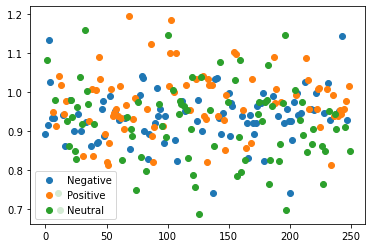

In [18]:
plt.scatter(np.array(np.arange(len(Class)))[negative_idx],np.array(mean_oenv)[negative_idx],label='Negative')
plt.scatter(np.array(np.arange(len(Class)))[positive_idx],np.array(mean_oenv)[positive_idx],label='Positive')
plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(mean_oenv)[neutral_idx],label='Neutral')
plt.legend()

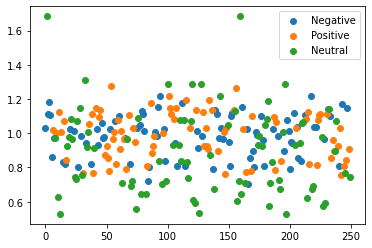

In [19]:
plt.scatter(np.array(np.arange(len(Class)))[negative_idx],np.array(std_oenv)[negative_idx],label='Negative')
plt.scatter(np.array(np.arange(len(Class)))[positive_idx],np.array(std_oenv)[positive_idx],label='Positive')
plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(std_oenv)[neutral_idx],label='Neutral')
plt.legend()

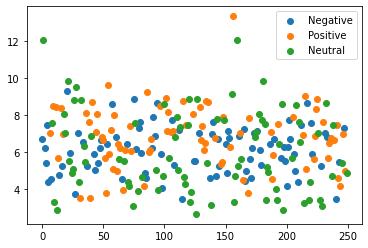

In [20]:
plt.scatter(np.array(np.arange(len(Class)))[negative_idx],np.array(minmax)[negative_idx],label='Negative')
plt.scatter(np.array(np.arange(len(Class)))[positive_idx],np.array(minmax)[positive_idx],label='Positive')
plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(minmax)[neutral_idx],label='Neutral')
plt.legend()

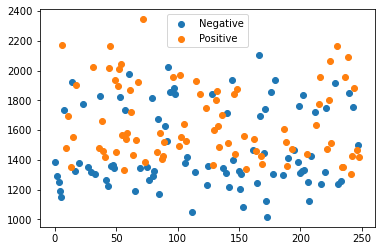

In [21]:
plt.scatter(np.array(np.arange(len(Class)))[negative_idx],np.array(mean_spec_bw)[negative_idx],label='Negative')
plt.scatter(np.array(np.arange(len(Class)))[positive_idx],np.array(mean_spec_bw)[positive_idx],label='Positive')
# plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(mean_spec_bw)[neutral_idx],label='Neutral')
plt.legend()

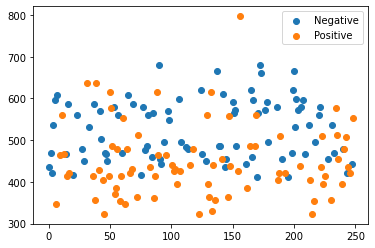

In [22]:
plt.scatter(np.array(np.arange(len(Class)))[negative_idx],np.array(mean_rms)[negative_idx],label='Negative')
plt.scatter(np.array(np.arange(len(Class)))[positive_idx],np.array(mean_rms)[positive_idx],label='Positive')
# plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(mean_rms)[neutral_idx],label='Neutral')
plt.legend()

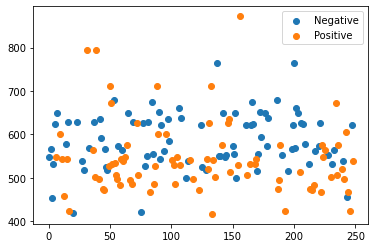

In [23]:
plt.scatter(np.array(np.arange(len(Class)))[negative_idx],np.array(std_rms)[negative_idx],label='Negative')
plt.scatter(np.array(np.arange(len(Class)))[positive_idx],np.array(std_rms)[positive_idx],label='Positive')
# plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(std_rms)[neutral_idx],label='Neutral')
plt.legend()

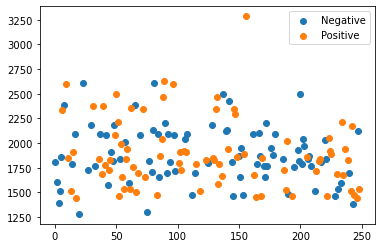

In [24]:
plt.scatter(np.array(np.arange(len(Class)))[negative_idx],np.array(minmax_rms)[negative_idx],label='Negative')
plt.scatter(np.array(np.arange(len(Class)))[positive_idx],np.array(minmax_rms)[positive_idx],label='Positive')
# plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(minmax_rms)[neutral_idx],label='Neutral')
plt.legend()

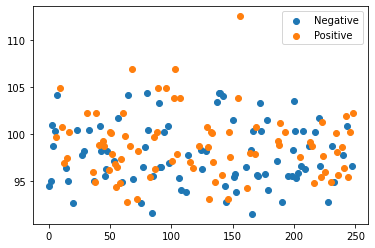

In [25]:
plt.scatter(np.array(np.arange(len(Class)))[negative_idx],np.array(mfcc_out_std)[negative_idx],label='Negative')
plt.scatter(np.array(np.arange(len(Class)))[positive_idx],np.array(mfcc_out_std)[positive_idx],label='Positive')
# plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(mfcc_out_std)[neutral_idx],label='Neutral')
plt.legend()

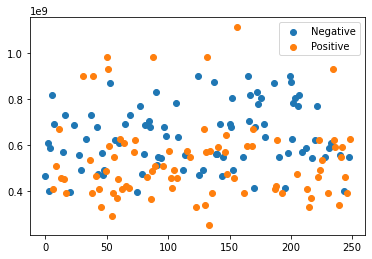

In [26]:
plt.scatter(np.array(np.arange(len(Class)))[negative_idx],np.array(melspec_mean)[negative_idx],label='Negative')
plt.scatter(np.array(np.arange(len(Class)))[positive_idx],np.array(melspec_mean)[positive_idx],label='Positive')
# plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(melspec_mean)[neutral_idx],label='Neutral')
plt.legend()

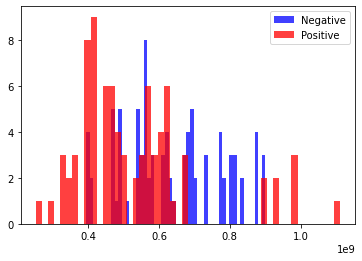

In [41]:
plt.hist([np.array(melspec_mean)[negative_idx]],50,color='blue',label='Negative',alpha=0.75)
plt.hist([np.array(melspec_mean)[positive_idx]],50,color='red',label='Positive',alpha=0.75)
# plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(melspec_std)[neutral_idx],label='Neutral')
plt.legend()

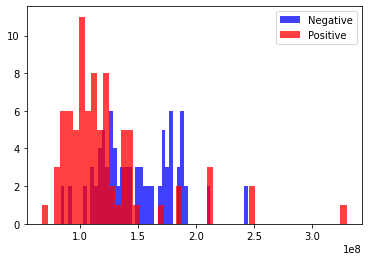

In [40]:
plt.hist([np.array(melspec_std)[negative_idx]],50,color='blue',label='Negative',alpha=0.75)
plt.hist([np.array(melspec_std)[positive_idx]],50,color='red',label='Positive',alpha=0.75)
# plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(melspec_std)[neutral_idx],label='Neutral')
plt.legend()

In [1]:
[np.array(np.arange(len(Class)))[negative_idx],np.array(melspec_std)[negative_idx]]

NameError: name 'np' is not defined

In [ ]:
plt.scatter(np.array(np.arange(len(Class)))[negative_idx],np.array(melspec_std)[negative_idx],label='Negative')
plt.scatter(np.array(np.arange(len(Class)))[positive_idx],np.array(melspec_std)[positive_idx],label='Positive')
# plt.scatter(np.array(np.arange(len(Class)))[neutral_idx],np.array(melspec_std)[neutral_idx],label='Neutral')
plt.legend()

In [ ]:
# from sklearn import tree
# class_Names=['0','1','2']

# features_names=['mean_constrast','mean_oenv','std_oenv',
#                 'minmax','mean_spec_bw','mean_rms',
#                 'std_rms','minmax_rms','mfcc_out_std','melspec_mean','melspec_std']



# from sklearn.tree import plot_tree

# fig = plt.figure(figsize=(60, 60))
# plot_tree(model.estimators_[0], 
#           feature_names=features_names,
#           class_names=class_Names, 
#           filled=True, impurity=True, 
#           rounded=False)
# ;

In [ ]:
sample_length = []       
delta_mean_beatframes=[]
tempo_data=[]
std_constrast=[]
mean_constrast=[]
mean_oenv=[]
std_oenv=[]
minmax=[]
mean_spec_flatness=[]
minmax_spec_flatness=[]
max_spec_flatness=[]
mean_pulse_lognorm=[]
minmax_pulse_lognorm=[]
max_spec_bw=[]
min_spec_bw=[]
mean_spec_bw=[]
std_spec_bw=[]
minmax_spec_bw=[]
mean_rms= []
std_rms=[]
minmax_rms=[]
mean_max_roll= []
mean_min_roll= []
mean_min_max=[]
stft_out=[]
chroma_stft=[]
mfcc_out =[]
chroma_stft_std=[]
mfcc_out_std =[]
melspec_mean=[]
melspec_std=[]
nb_features=18


for i in range(len(file_names_TEST)):

        
        wav_fname = pjoin(data_dir_test, file_names_TEST[i])
        samplerate, data = wavfile.read(wav_fname)
        number_of_channels = 2
        length = data.shape[0] / samplerate
        sample_length.append(length)
        length = 0.01
        Data=np.array(data[:,1]).astype(float)

        tempo, beatframes= librosa.beat.beat_track(y=Data)
        

        delta=[]

                             
        for k in range(0,len(beatframes)-1):
            delta.append(beatframes[k+1]-beatframes[k])

        lib_STFT=np.abs(librosa.stft(Data))
        contrast = librosa.feature.spectral_contrast(S=lib_STFT)
        
        oenv = librosa.onset.onset_strength(y=Data)
        prior = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)
        mean_pulse_lognorm.append(np.mean(np.array(librosa.beat.plp(onset_envelope=oenv,
                                 prior=prior))))
        minmax_pulse_lognorm.append(max(np.array(librosa.beat.plp(onset_envelope=oenv,
                                 prior=prior)))-min(np.array(librosa.beat.plp(onset_envelope=oenv,
                                 prior=prior))))

        tempo_data.append(tempo)
        delta_mean_beatframes.append(np.mean(delta))
        std_constrast.append(np.std(contrast))
        mean_constrast.append(np.mean(contrast))
        mean_rms.append(np.mean(librosa.feature.rms(y=Data)[0]))
        std_rms.append(np.std(librosa.feature.rms(y=Data)[0]))
        minmax_rms.append(max(librosa.feature.rms(y=Data)[0])-min(librosa.feature.rms(y=Data)[0]))
        mean_oenv.append(np.mean(oenv))
        std_oenv.append(np.std(oenv))
        minmax.append(abs(max(oenv)-abs(min(oenv))))
        mean_spec_flatness.append(np.mean(librosa.feature.spectral_flatness(y=Data)))
        max_spec_flatness.append(np.max(np.array(librosa.feature.spectral_flatness(y=Data))))
        minmax_spec_flatness.append(np.max(np.array(librosa.feature.spectral_flatness(y=Data))-min(np.array(librosa.feature.spectral_flatness(y=Data)))))  
        max_spec_bw.append(max(np.array(librosa.feature.spectral_bandwidth(y=Data)[0])))
        min_spec_bw.append(min(np.array(librosa.feature.spectral_bandwidth(y=Data)[0])))
        mean_spec_bw.append(np.mean(np.array(librosa.feature.spectral_bandwidth(y=Data)[0])))
        std_spec_bw.append(np.std(np.array(librosa.feature.spectral_bandwidth(y=Data)[0])))
        minmax_spec_bw.append(max(np.array(librosa.feature.spectral_bandwidth(y=Data)[0]))-min(np.array(librosa.feature.spectral_bandwidth(y=Data)[0])))
        mean_max_roll.append(np.mean(np.array(librosa.feature.spectral_rolloff(y=Data,roll_percent=0.99)[0])))
        mean_min_roll.append(np.mean(np.array(librosa.feature.spectral_rolloff(y=Data,roll_percent=0.01)[0])))
        mean_min_max.append(np.mean(np.array(librosa.feature.spectral_rolloff(y=Data,roll_percent=0.99)[0])) -np.mean(np.array(librosa.feature.spectral_rolloff(y=Data,roll_percent=0.01)[0])))
           
            
            


        stft_out = np.abs(librosa.stft(Data))
        chroma_stft.append(np.mean(np.mean(librosa.feature.chroma_stft(S=stft_out).T,axis=0)))
        chroma_stft_std.append(np.std(np.mean(librosa.feature.chroma_stft(S=stft_out).T,axis=0)))
        mfcc_out.append(np.mean(np.mean(librosa.feature.mfcc(y=Data).T,axis=0)))
        mfcc_out_std.append(np.std(np.mean(librosa.feature.mfcc(y=Data).T,axis=0)))
        melspec_mean.append(np.std(np.mean(librosa.feature.melspectrogram(y=Data).T,axis=0)))
        melspec_std.append(np.mean(np.mean(librosa.feature.melspectrogram(y=Data).T,axis=0)))


# Choosing features : 
    
#https://librosa.org/doc/latest/feature.html

In [ ]:
data_matrix_TEST=pd.DataFrame(np.vstack((mean_constrast,mean_oenv,
                        std_oenv,minmax,mean_spec_bw,mean_rms,std_rms,minmax_rms,mfcc_out_std,melspec_mean,
                        melspec_std))).T

print(data_matrix.shape)

print(model.predict(data_matrix_TEST))
print(file_names_TEST)
   

In [ ]:
data_matrix_TEST

In [ ]:
labl=[]
for i in range(len(Class)):
    if Class[i]=="Negative":
        labl.append(0)
    if Class[i]=="Positive":
        labl.append(1)
    if Class[i]=="Neutral":
        labl.append(2)